C:\Users\ergot\AppData\Local\Temp\ipykernel_8776\2232105952.py:25: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mu, sigma, N).T


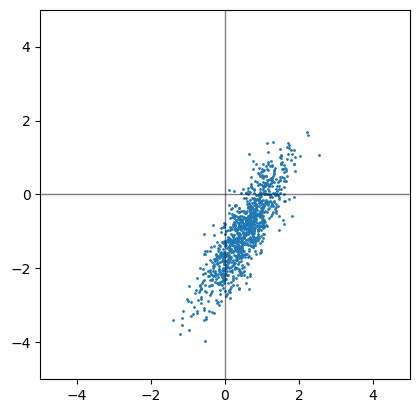

In [129]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


def plot_axis():
    plt.axhline(y=0, c='k', linewidth=1, alpha=0.5)
    plt.axvline(x=0, c='k', linewidth=1, alpha=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.gca().set_aspect('equal')

def plot(A):
    plot_axis()
    plt.scatter(A[0], A[1], s=1)


mu = [0.5, -1]
sigma = np.array(
    [[.25, .6],
     [ .6,  1]]
    )

N = 1024
X = np.random.multivariate_normal(mu, sigma, N).T

plot(X)

# Zero-mean

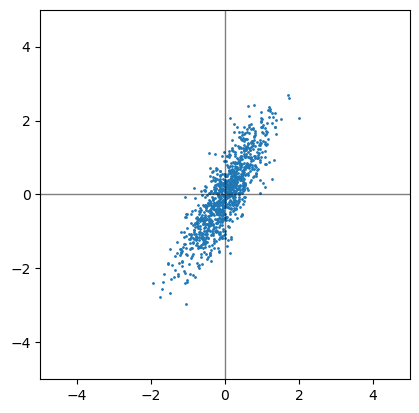

In [130]:
_X = X - np.mean(X, axis=1)[:, np.newaxis]

plot(_X)

In [131]:
# Covariance matrix
cov = _X.dot(_X.T) / (N - 1)
cov

array([[0.33553833, 0.4690666 ],
       [0.4690666 , 0.93128959]])

In [132]:
np.cov(X)

array([[0.33553833, 0.4690666 ],
       [0.4690666 , 0.93128959]])

$\Sigma$ = $A$ * $A^{T}$

### Gaussian whitening by Spectral Decomposition

$\Sigma$ = $U$ * $\Lambda$ * $U^{T}$

$A$ = $U$ * $\Lambda^{1/2}$

$A^{-1}$ = $\Lambda^{-1/2}$ * $U^{T}$

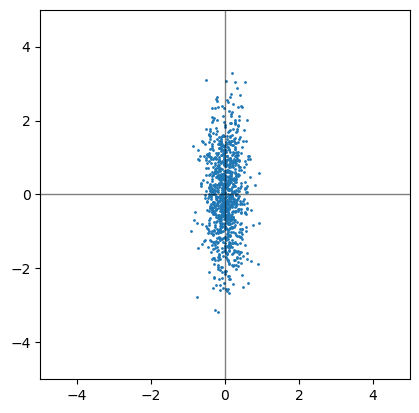

In [146]:
# Spectral decomposition
L, U = la.eig(cov)

# rotate back
X_rot = U.T.dot(_X)

plot(X_rot)

### Scale

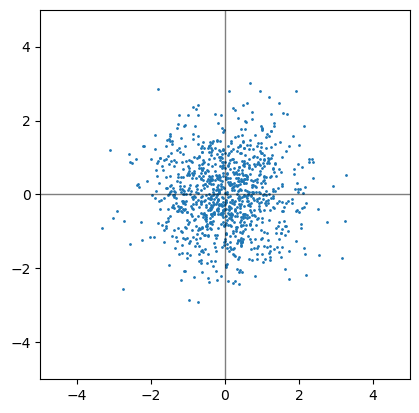

In [145]:
plot(X_rot / np.sqrt(L)[:, np.newaxis])

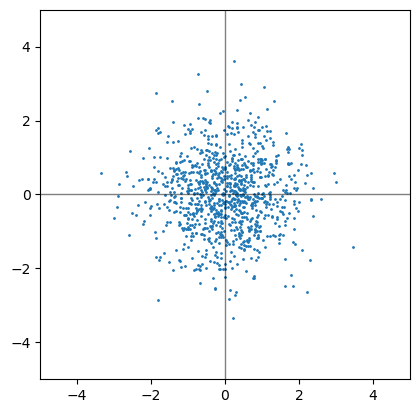

In [142]:
# Whitening by Cholesky decomposition

A = la.cholesky(cov)

plot(la.inv(A).dot(_X))

In [268]:
def pos_def(dims):
    while True:
        A = np.random.rand(dims, dims)
        A = A.T.dot(A)
        return A

S = pos_def(16)

In [269]:
%timeit A = la.inv(la.cholesky(S))
%timeit

17.9 µs ± 71.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [270]:
%%timeit
L, U = la.eig(S)
A = U.T / np.sqrt(L)[:, np.newaxis]

55.4 µs ± 72.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


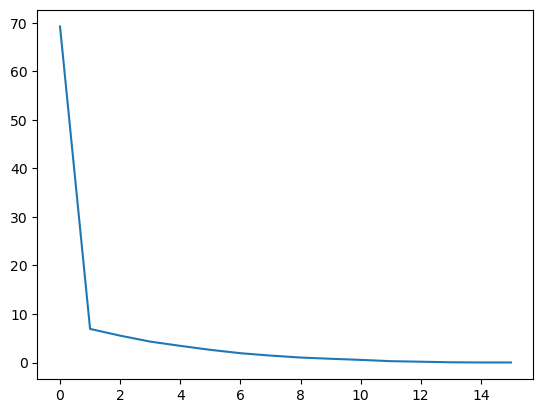

In [271]:
L, U = la.eig(S)

def pca_loss(A, n):
    _A = np.zeros_like(A)

    for i in range(n):
        u = U[:, i][:, np.newaxis]
        _A += u.dot(u.T) * L[i]

    return la.norm(_A - A)

loss = [pca_loss(S, i) for i in range(A.shape[0])]
plt.plot(loss);